<a href="https://colab.research.google.com/github/NoraYoussefi/H-M-Personalized-Fashion-Recommendation/blob/master/H%26M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norayoussefi2000","key":"7e74c4fa79094fa2ee2da38e246a18ea"}'}

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           4713        715  0.9375           
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            708        624  0.9375           
datasets/muratkokludataset/pistachio-dataset                                   Pistachio Dataset                                  2MB  2022-04-03 08:38:21            429        538  0.9375           


In [ ]:
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [03:51<00:00, 110MB/s] 
100% 28.7G/28.7G [03:51<00:00, 133MB/s]


In [ ]:
!unzip h-and-m-personalized-fashion-recommendations.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/089/0890677001.jpg  
  inflating: images/089/0890677002.jpg  
  inflating: images/089/0890677004.jpg  
  inflating: images/089/0890683001.jpg  
  inflating: images/089/0890683002.jpg  
  inflating: images/089/0890684001.jpg  
  inflating: images/089/0890684002.jpg  
  inflating: images/089/0890686002.jpg  
  inflating: images/089/0890697001.jpg  
  inflating: images/089/0890697002.jpg  
  inflating: images/089/0890700001.jpg  
  inflating: images/089/0890717001.jpg  
  inflating: images/089/0890717002.jpg  
  inflating: images/089/0890717003.jpg  
  inflating: images/089/0890722001.jpg  
  inflating: images/089/0890722002.jpg  
  inflating: images/089/0890734001.jpg  
  inflating: images/089/0890734003.jpg  
  inflating: images/089/0890741001.jpg  
  inflating: images/089/0890745001.jpg  
  inflating: images/089/0890746001.jpg  
  inflating: images/089/0890766001.jpg  
  inflating: images/089/0890766002.jpg  
  infl

# had partie na9az 3liha mn hna 


In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
import numpy as np


example

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

In [ ]:
DATASET_PATH = "/content/"
print(os.listdir(DATASET_PATH))

['.config', 'articles.csv', 'customers.csv', 'kaggle.json', 'h-and-m-personalized-fashion-recommendations.zip', 'transactions_train.csv', 'sample_submission.csv', 'images', '.ipynb_checkpoints']


In [ ]:
df = pd.read_csv(DATASET_PATH + "articles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['article_id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,image
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,108775015.jpg
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,108775044.jpg
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,108775051.jpg
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065001.jpg
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065002.jpg
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065011.jpg
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",111565001.jpg
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",111565003.jpg
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...,111586001.jpg
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs...",111593001.jpg


In [ ]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    # num=str(0)+num
    return DATASET_PATH+"images/010/0108775015.jpg"
# print(img_path("10","0108775015"))
# img1= cv2.imread("images/010/0108775015.jpg")
# print(img1)
# (h, w, c) = img1.shape[:3]
# print("width: {} pixels".format(w))
# print("height: {}  pixels".format(h))
# print("channels: {}".format(c))
def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    (h, w, c) = img.shape[:3]
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

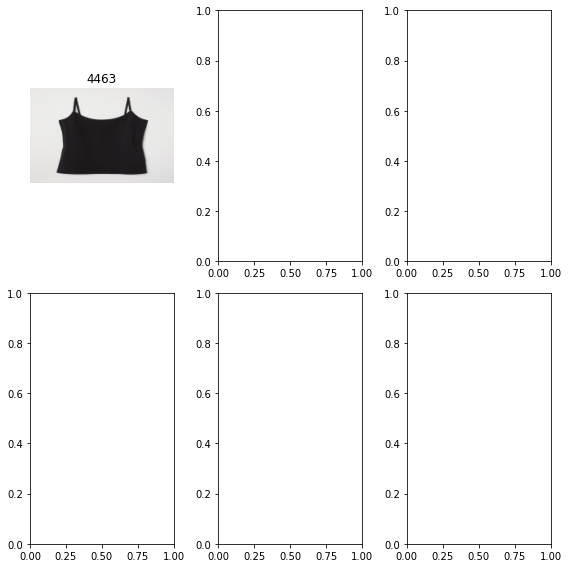

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# img     = cv2.imread("/content/images/010/0108775015.jpg")
# print(img)
# generation of a dictionary of (title, images)
figures = {str(i): load_image(row.image) for i, row in df.sample(1).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)
# generation of a dictionary of (title, images)
# for n in range (10,96):
#   figures = {str(i): load_image(n,row.image) for i, row in df.sample(3).iterrows()}
# # plot of the images in a figure, with 2 rows and 3 columns
# plot_figures(figures, 2, 3)

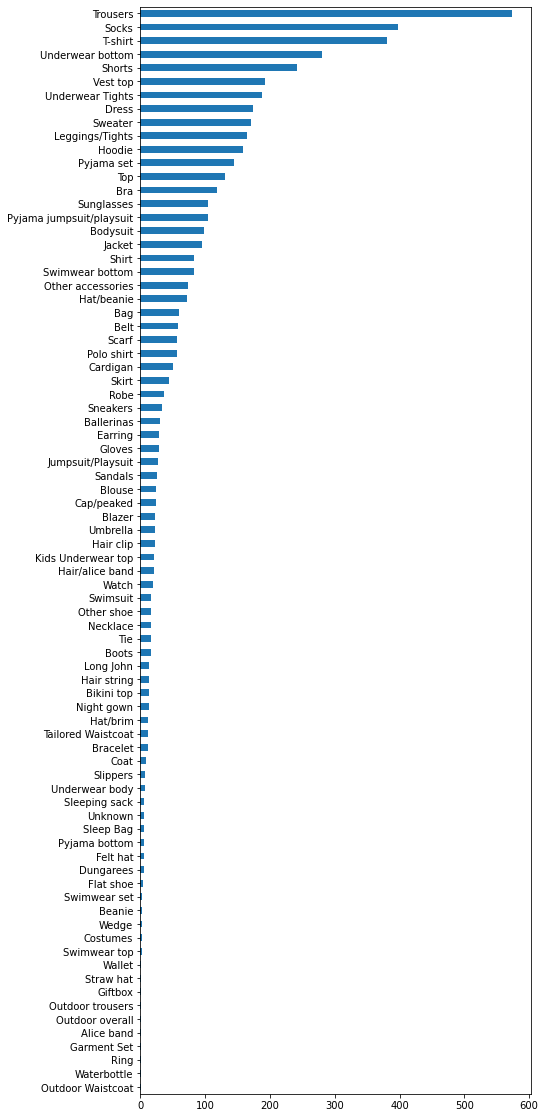

In [ ]:
plt.figure(figsize=(7,20))
df.product_type_name.value_counts().sort_values().plot(kind='barh')

In [ ]:
!pip install keras-resnet

In [ ]:
import tensorflow as tf
import keras
from keras import Model
from keras_resnet.models import ResNet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.8.0'

# htan hna 

#H&M notebook

1-importing bibs

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

2-define images path

In [ ]:
inputFolder =  "/content/images/"

3- Loading and Data Preprocessing 

In [ ]:
#  Function generate the images fullpath from path(directory path) and image name

# def getImagePaths(path):
   
#     image_names = []    #list of all mhm hadouk lifbalk
#     for dirname, _, filenames in os.walk(path):
#         for filename in filenames:
#             fullpath = os.path.join(dirname, filename)
#             image_names.append(fullpath)
#     return image_names

import os 
def getImagePaths(inputFolder):
   
    image_names = []    #list of all mhm hadouk lifbalk
    for root, directories, filenames in os.walk(inputFolder): 
       for filename in filenames:
          fullpath = os.path.join(root,filename)
          image_names.append(fullpath)
    return image_names

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image
# get data with a limited number
def load_data():
    output=[]
    output=getImagePaths(inputFolder)[:10000]  #se limiter a 10000 images 
    return output

4-Defining model and extracting features for the training data

# Xception algorithm:

Xception is a convolutional neural network that is 71 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database . The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

In [ ]:
def model():
    model=Xception(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
        model.summary()
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()  #The flatten() function is used to get a copy of an given array collapsed into one dimension.
    # print(features)
    return features



5-Finding the similar image through LSH and cosine similarity

LSH : Locality-Sensitive Hashing

 **locality-sensitive hashing (LSH)** is an algorithmic technique that hashes similar input items into the same "buckets" with high probability. (The number of buckets is much smaller than the universe of possible input items.) Since similar items end up in the same buckets, this technique can be used for data clustering and nearest neighbor search. 

 **why using it:**
 reduce the dimensionality of high-dimensional data

In [ ]:
def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten() 
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    print(new_feature)
    print(nbrs)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

6-Result (vector cosine)


In [ ]:
def input_show(data):
    plt.title("The selected image")
    plt.imshow(data)
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

def main():  
    features=[]
    output=load_data()
    main_model=model()
    #Limiting the data for training
    for i in output[:1299]:
        new_img=preprocess_img(i)
        features.append(feature_extraction(new_img,main_model))
    feature_vec = np.array(features)
    result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[170]))
    input_show(cv2.imread(output[170]))
    show_result(output,result)
  

if __name__=='__main__':
    main()

NameError: ignored